In [1]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import EarlyStopping as es

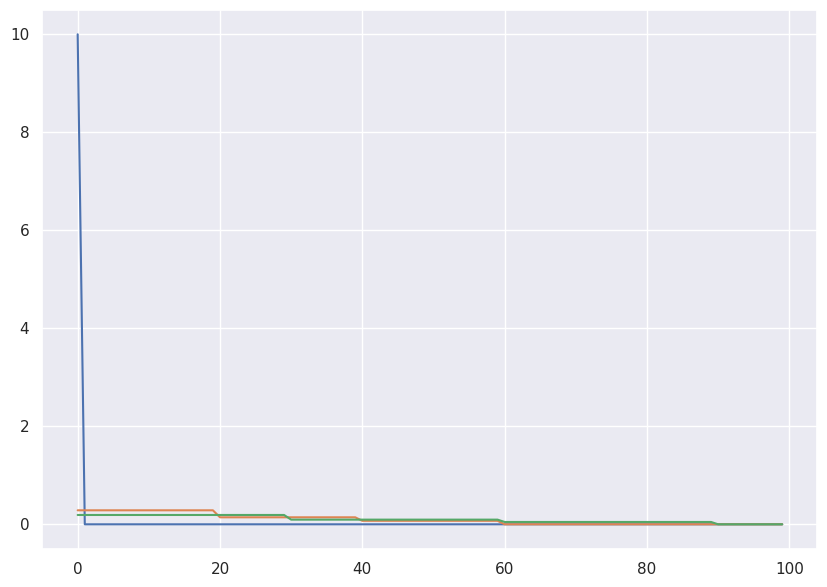

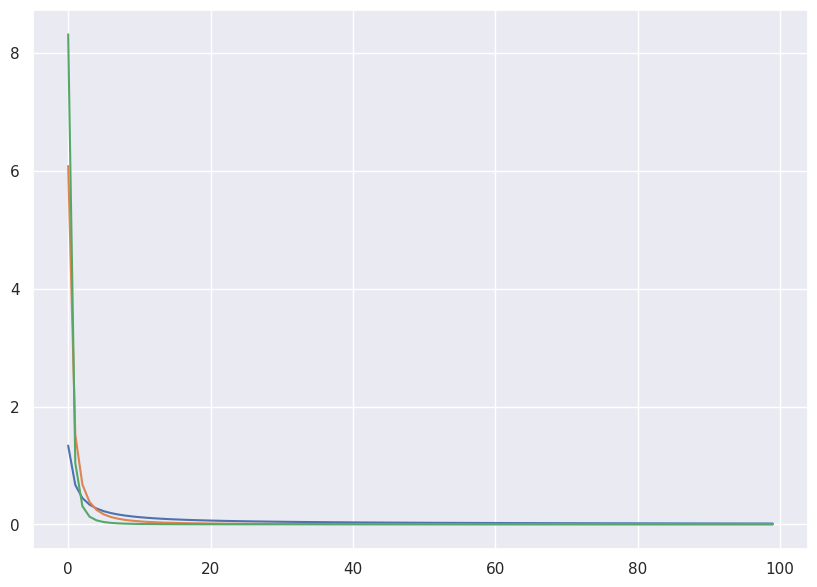

In [7]:
# Signals from the L2-boosting paper

# Metaparameters
sample_size = 1000
para_size   = 1000

# Gamma-sparse signals
beta_3   = 1 / (1 + np.arange(paraSize))**3
beta_3   = 10 * beta_3 / np.sum(np.abs(beta_3))

beta_2   = 1 / (1 + np.arange(paraSize))**2  
beta_2   = 10 * beta_2 / np.sum(np.abs(beta_2))

beta_1   = 1 / (1 + np.arange(paraSize))
beta_1   = 10 * beta_1 / np.sum(np.abs(beta_1))

# S-sparse signals
beta_15        = np.zeros(paraSize)  
beta_15[0]     = 1
beta_15        = 10 * beta_15 / np.sum(np.abs(beta_15))

beta_60        = np.zeros(paraSize)  
beta_60[0:20]  = 1
beta_60[20:40] = 0.5
beta_60[40:60] = 0.25
beta_60        = 10 * beta_60 / np.sum(np.abs(beta_60))

beta_90        = np.zeros(paraSize)  
beta_90[0:30]  = 1
beta_90[30:60] = 0.5
beta_90[60:90] = 0.25
beta_90        = 10 * beta_90 / np.sum(np.abs(beta_90))

fig = plt.figure(figsize = (10,7))
plt.plot(beta_15[0:100])
plt.plot(beta_60[0:100])
plt.plot(beta_90[0:100])

fig = plt.figure(figsize = (10,7))
plt.plot(beta_1[0:100])
plt.plot(beta_2[0:100])
plt.plot(beta_3[0:100])

In [8]:
# Simulating data
cov   = np.identity(paraSize)
sigma = np.sqrt(1)
X     = np.random.multivariate_normal(np.zeros(paraSize), cov, sample_size)
f     = X @ beta_90
eps   = np.random.normal(0, sigma, sample_size)
Y     = f + eps

(0.0, 2.0)

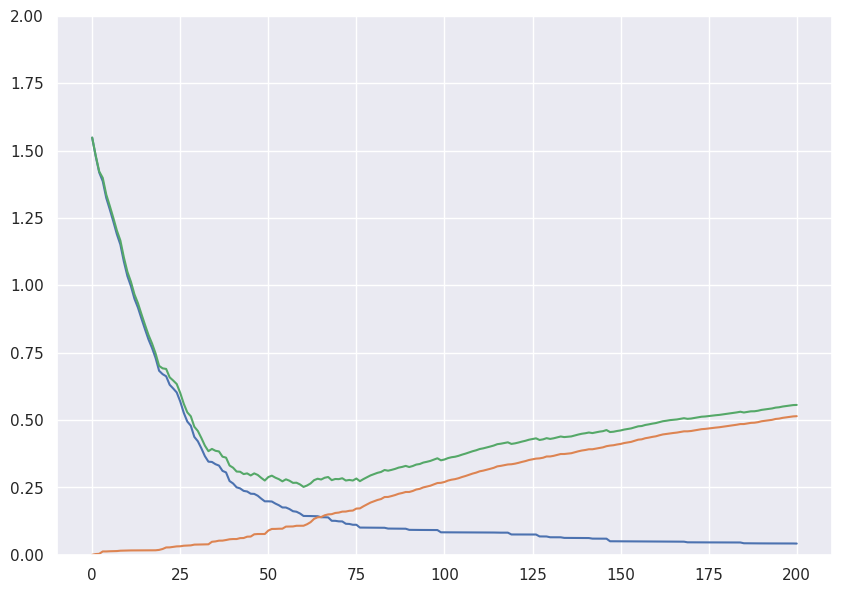

In [11]:
# Full L2-boosting path with bias-variance decomposition
alg = es.L2_boost(X, Y, f)
alg.boost(200)

fig = plt.figure(figsize = (10, 7))
plt.plot(alg.bias2)
plt.plot(alg.stoch_error)
plt.plot(alg.mse)
plt.ylim((0, 2))

In [31]:
# L2-boosting until the balanced oracle is reached
alg = es.L2_boost(X, Y, f)
alg.boost_to_balanced_oracle()
bal_oracle = alg.iter
bal_oracle

65

In [32]:
# L2-boosting with early stopping according to the true empirical noise level
emp_noise_level = np.mean(eps**2)
alg = es.L2_boost(X, Y, f)
alg.boost_to_early_stop(crit = emp_noise_level, max_iter = sample_size)
early_stopping_time = alg.iter
early_stopping_time

56

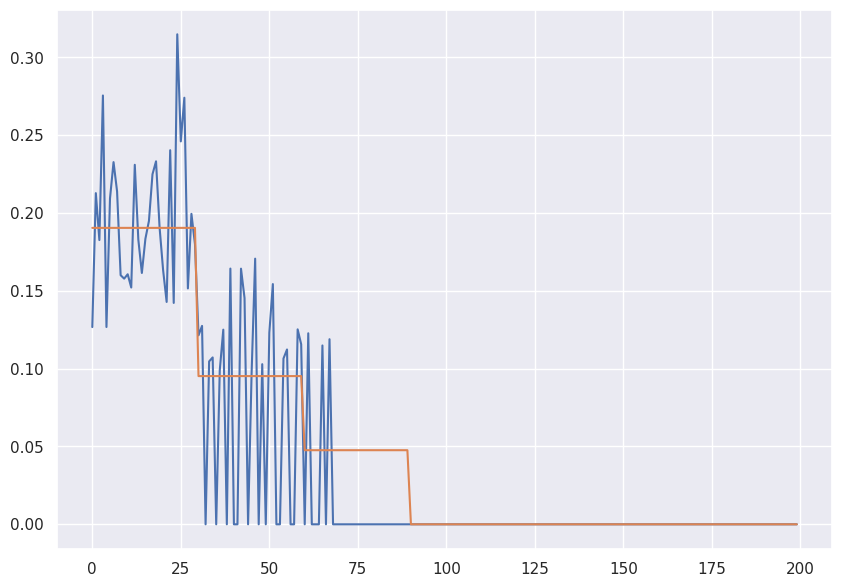

In [33]:
# Estimated signal vs. true signal
fig = plt.figure(figsize = (10,7))
plt.plot(alg.coefficients[0:200])
plt.plot(beta_90[0:200])